<a href="https://colab.research.google.com/github/rodrigorochag/Atividade-14.5-JSON-PPI2/blob/main/cnn_pytorch_vegetables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder

import os
from collections import Counter

In [7]:
# Install the Kaggle library
!pip install -q kaggle

# Set Kaggle credentials
import json
import os

# Replace the following with your Kaggle username and API key

kaggle_info = {
    "username": "user_kaggle",
    "key": "api_key"
}
# Save Kaggle credentials to a JSON file
os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as file:
    json.dump(kaggle_info, file)

# Change the permissions of the file
!chmod 600 /root/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d misrakahmed/vegetable-image-dataset
# Unzip the dataset
!unzip -q /content/vegetable-image-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
License(s): CC-BY-SA-4.0
 99% 530M/534M [00:11<00:00, 77.8MB/s]
100% 534M/534M [00:11<00:00, 47.8MB/s]


In [38]:
train_dataset = '/content/Vegetable Images/train'
test_dataset= '/content/Vegetable Images/test'
validation_dataset = '/content/Vegetable Images/validation'

In [21]:
# List subdirectories (assuming each subdirectory is a class)
classes = os.listdir(train_dataset)
print(f'Classes: {classes}')

# Count images per class
class_counts = {cls: len(os.listdir(os.path.join(train_dataset, cls))) for cls in classes}
print(f'Image count per class: {class_counts}')
print("Quantidade classes:",len(class_counts))

Classes: ['Capsicum', 'Potato', 'Carrot', 'Brinjal', 'Papaya', 'Radish', 'Cauliflower', 'Bean', 'Bottle_Gourd', 'Cucumber', 'Pumpkin', 'Tomato', 'Bitter_Gourd', 'Broccoli', 'Cabbage']
Image count per class: {'Capsicum': 1000, 'Potato': 1000, 'Carrot': 1000, 'Brinjal': 1000, 'Papaya': 1000, 'Radish': 1000, 'Cauliflower': 1000, 'Bean': 1000, 'Bottle_Gourd': 1000, 'Cucumber': 1000, 'Pumpkin': 1000, 'Tomato': 1000, 'Bitter_Gourd': 1000, 'Broccoli': 1000, 'Cabbage': 1000}
Quantidade classes: 15


In [39]:
from PIL import Image

def check_image_properties(image_dir):
    image_sizes = []
    image_formats = []

    for cls in classes:
        class_dir = os.path.join(image_dir, cls)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            try:
                with Image.open(image_path) as img:
                    image_sizes.append(img.size)
                    image_formats.append(img.format)
            except Exception as e:
                print(f"Error with image {image_name}: {e}")

    return image_sizes, image_formats

sizes_train, formats_train = check_image_properties(train_dataset)
sizes_test, formats_test = check_image_properties(test_dataset)
sizes_val, formats_val = check_image_properties(validation_dataset)


print(f'Image format train_dataset{Counter(formats_train)}')

print(f'Image size train_dataset: {Counter(sizes_train)}')
print(f'Image size test_dataset{Counter(sizes_test)}')
print(f'Image size validation_dataset{Counter(sizes_val)}')



Image format train_datasetCounter({'JPEG': 15000})
Image size train_dataset: Counter({(224, 224): 15000})
Image size test_datasetCounter({(224, 224): 3000})
Image size validation_datasetCounter({(224, 224): 3000})


There are 6 images with non standard resolution



In [36]:
import os
from PIL import Image

def resize_images_in_folder(image_dir, output_size=(224, 224)):
    """
    Resize all images in the given directory (including subdirectories) to the specified size.

    Args:
        image_dir (str): The directory containing images to resize.
        output_size (tuple): The desired output size (width, height).
    """
    for root, _, files in os.walk(image_dir):  # Iterate through all files and subdirectories
        for file in files:
            if file.lower().endswith(('.jpeg', '.jpg', '.png')):  # Process only image files
                image_path = os.path.join(root, file)
                try:
                    with Image.open(image_path) as img:
                        # Resize the image
                        resized_img = img.resize(output_size, Image.ANTIALIAS)
                        # Save the resized image, overwriting the original
                        resized_img.save(image_path)
                        print(f"Resized and saved: {image_path}")
                except Exception as e:
                    print(f"Error processing image {image_path}: {e}")

# Example usage
image_dataset = '/content/Vegetable Images'
resize_images_in_folder(image_dataset, output_size=(224, 224))


<ipython-input-36-0e1d0cc8f618>:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize(output_size, Image.ANTIALIAS)


Streaming output truncated to the last 5000 lines.
Resized and saved: /content/Vegetable Images/test/Radish/1021.jpg
Resized and saved: /content/Vegetable Images/test/Radish/1077.jpg
Resized and saved: /content/Vegetable Images/test/Radish/1153.jpg
Resized and saved: /content/Vegetable Images/test/Radish/1175.jpg
Resized and saved: /content/Vegetable Images/test/Radish/1167.jpg
Resized and saved: /content/Vegetable Images/test/Radish/1100.jpg
Resized and saved: /content/Vegetable Images/test/Radish/1001.jpg
Resized and saved: /content/Vegetable Images/test/Radish/1162.jpg
Resized and saved: /content/Vegetable Images/test/Radish/1080.jpg
Resized and saved: /content/Vegetable Images/test/Radish/1089.jpg
Resized and saved: /content/Vegetable Images/test/Radish/1110.jpg
Resized and saved: /content/Vegetable Images/test/Radish/1004.jpg
Resized and saved: /content/Vegetable Images/test/Radish/1008.jpg
Resized and saved: /content/Vegetable Images/test/Radish/1118.jpg
Resized and saved: /conte

In [40]:
print("Confirming the resize: ")
sizes_train, formats_train = check_image_properties(train_dataset)
sizes_test, formats_test = check_image_properties(test_dataset)
sizes_val, formats_val = check_image_properties(validation_dataset)


print(f'Image format train_dataset{Counter(formats_train)}')

print(f'Image size train_dataset: {Counter(sizes_train)}')
print(f'Image size test_dataset{Counter(sizes_test)}')
print(f'Image size validation_dataset{Counter(sizes_val)}')

Confirming the resize: 
Image format train_datasetCounter({'JPEG': 15000})
Image size train_dataset: Counter({(224, 224): 15000})
Image size test_datasetCounter({(224, 224): 3000})
Image size validation_datasetCounter({(224, 224): 3000})


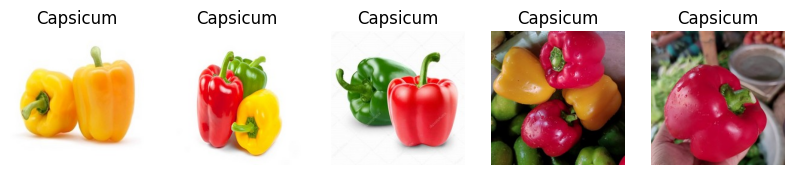

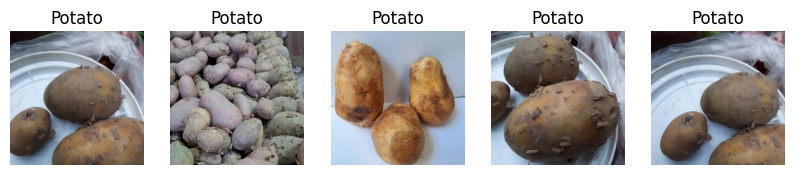

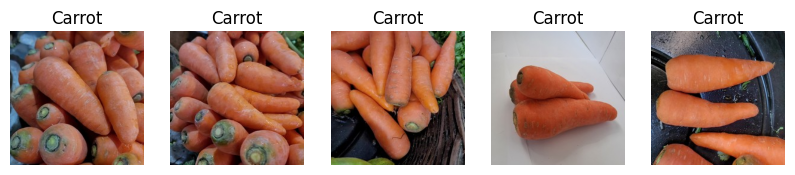

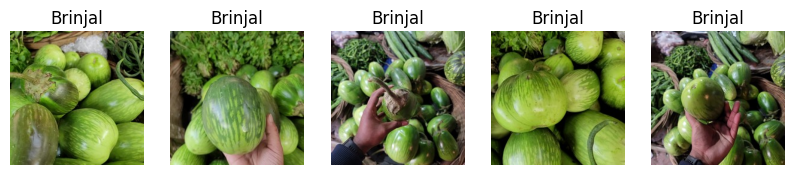

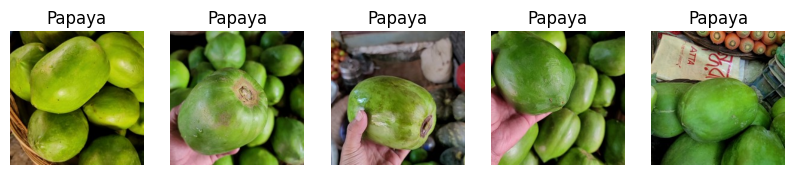

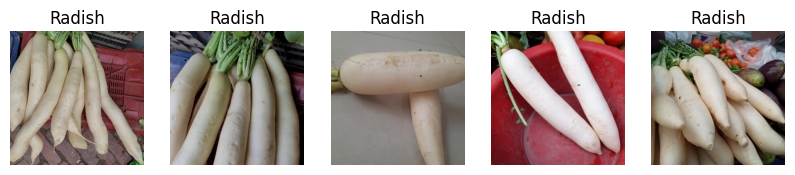

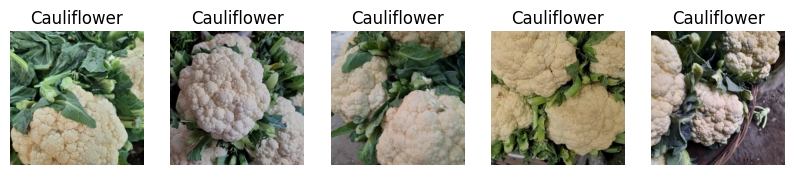

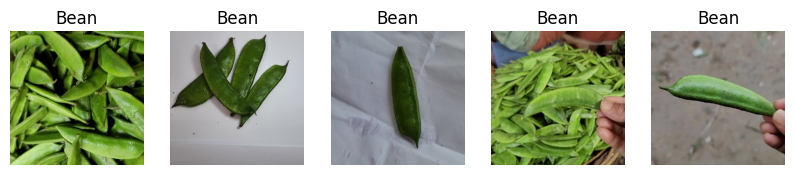

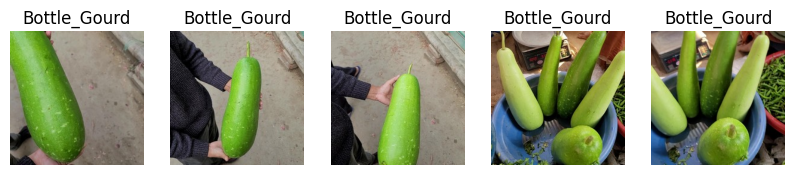

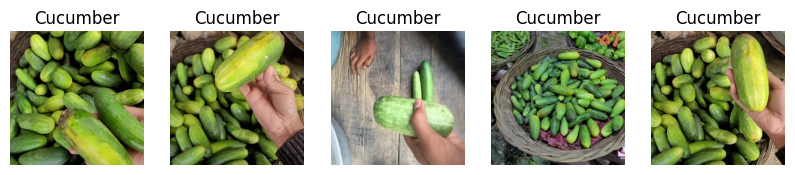

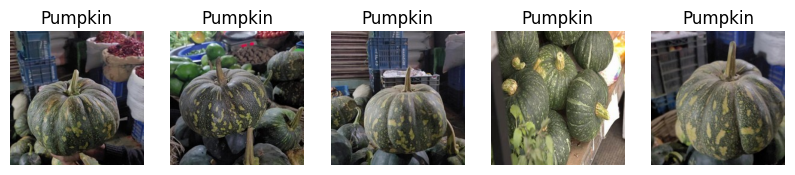

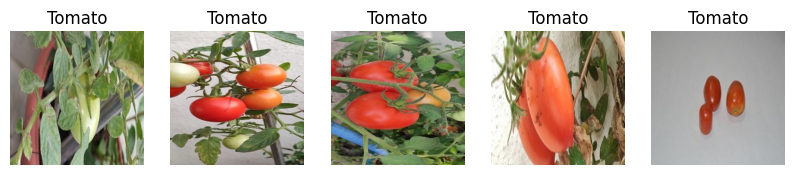

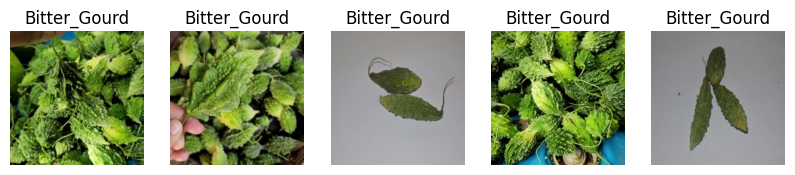

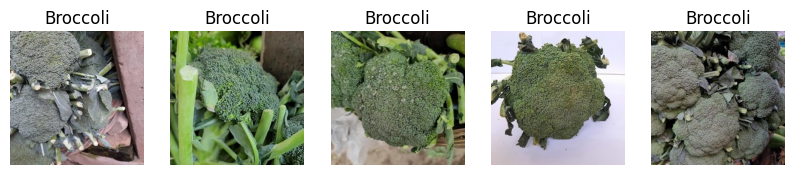

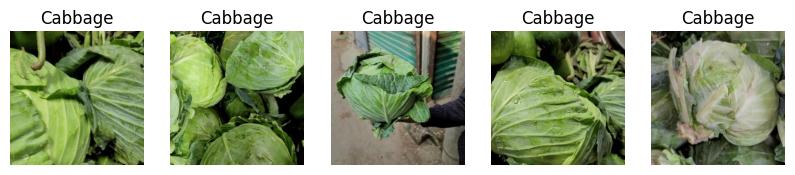

In [23]:
import matplotlib.pyplot as plt
import random

def plot_sample_images(image_dir, classes, num_samples=5):
    for cls in classes:
        class_dir = os.path.join(image_dir, cls)
        sample_images = random.sample(os.listdir(class_dir), num_samples)
        plt.figure(figsize=(10, 10))
        for i, img_name in enumerate(sample_images):
            img_path = os.path.join(class_dir, img_name)
            img = Image.open(img_path)
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
        plt.show()

plot_sample_images(train_dataset, classes)


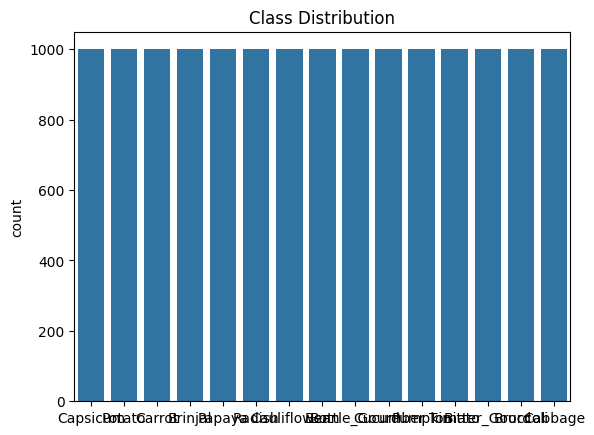

In [24]:
import seaborn as sns

class_labels = [cls for cls, count in class_counts.items() for _ in range(count)]
sns.countplot(x=class_labels)
plt.title('Class Distribution')
plt.show()
